In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# csv = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/datasets/heart.csv"

# df = pd.read_csv(csv)

# #save csv 
# df.to_csv('heart.csv', index=False)

# Importing

In [4]:
df = pd.read_csv('heart.csv')

df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.shape

(303, 14)

# Preprocessing

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

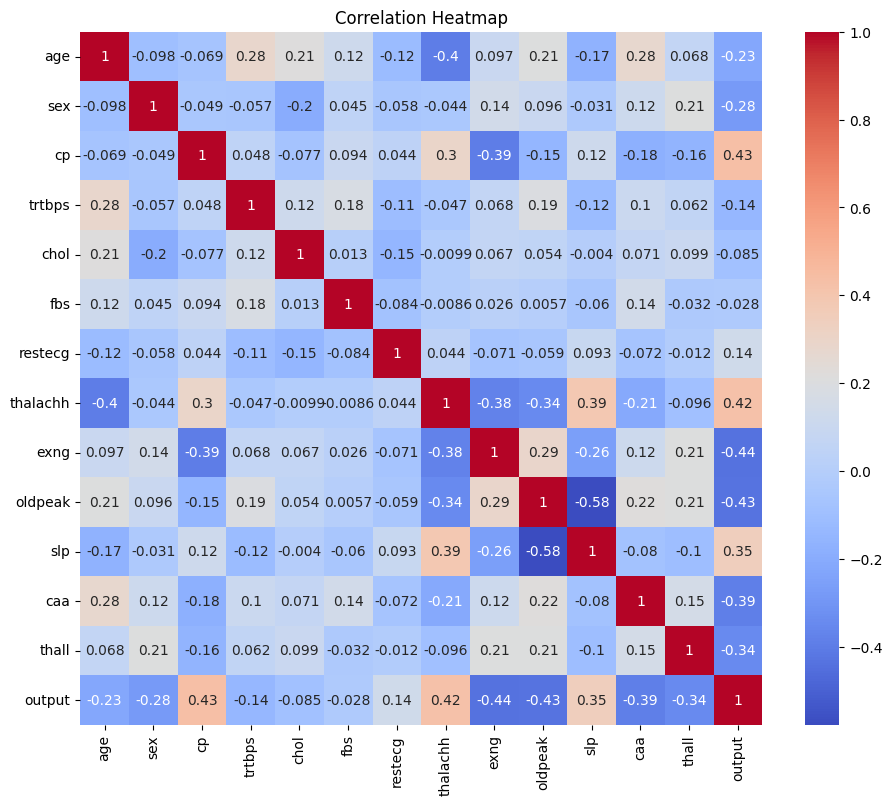

In [9]:
def plot_heatmap(dataset):
    plt.figure(figsize=(11, 9))
    sns.heatmap(dataset, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap(df.corr())

Removed trtbps
Removed chol
Removed fbs
Removed restecg


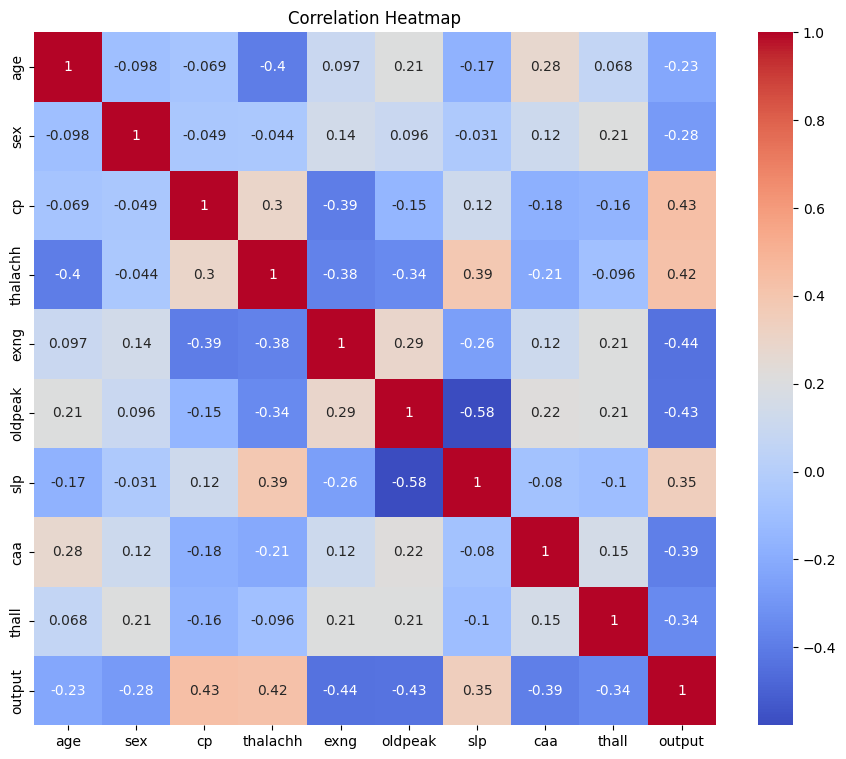

In [10]:
#remove features correlated with target less than 0.1

for col in df.columns:
    if abs(df[col].corr(df['output'])) < 0.15:
        df.drop(col, axis=1, inplace=True)
        print(f"Removed {col}")

#check correlation again
plot_heatmap(df.corr())


In [11]:
X = df.drop(columns=['output'])
y = df['output']

C:\Users\gabri\AppData\Local\Temp\ipykernel_70576\3853562793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset, palette='Set2')


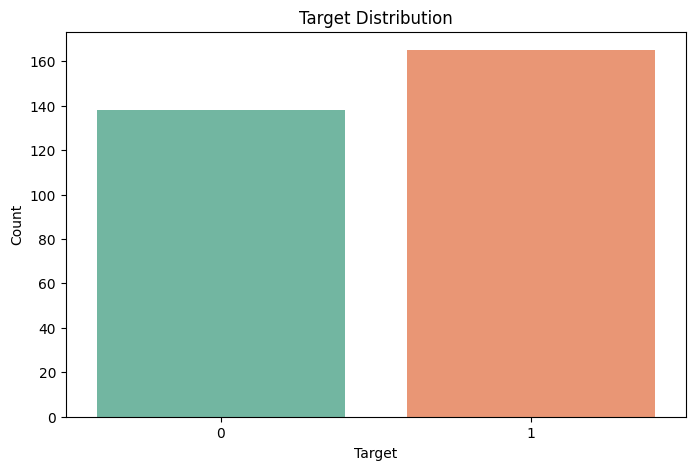

In [12]:
#target distribution

def plot_distribution(dataset):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=dataset, palette='Set2')
    plt.title('Target Distribution')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()

plot_distribution(y)

In [13]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
    ("ohe", OneHotEncoder(), ["cp"]),
    ("ss", StandardScaler(), ['age', 'caa', 'thalachh', 'oldpeak', "cp", "slp", "thall", "sex", "exng"]),
],
    remainder="passthrough",
    verbose_feature_names_out=False)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
# Convert the transformed data back to DataFrame

X_train = pd.DataFrame(X_train, columns=ct.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ct.get_feature_names_out())


X_train.head(10)

,cp_0,cp_1,cp_2,cp_3,age,caa,thalachh,oldpeak,cp,slp,thall,sex,exng
0,0.0,1.0,0.0,0.0,-0.318211,0.280475,0.367839,-0.230970,0.027757,0.940983,-0.550139,0.696177,-0.702728
1,1.0,0.0,0.0,0.0,2.397131,2.276797,0.553873,-0.907458,-0.931858,0.940983,-0.550139,0.696177,1.423025
2,0.0,0.0,1.0,0.0,-1.404348,-0.717686,2.042142,-0.230970,0.987373,-2.199954,1.135096,0.696177,-0.702728
3,0.0,0.0,1.0,0.0,-0.426825,0.280475,0.181806,-0.907458,0.987373,0.940983,1.135096,0.696177,1.423025
4,0.0,1.0,0.0,0.0,-0.318211,-0.717686,1.577058,-0.907458,0.027757,0.940983,-0.550139,0.696177,-0.702728
5,1.0,0.0,0.0,0.0,-1.078507,-0.717686,-0.097245,1.629370,-0.931858,-0.629485,-0.550139,0.696177,1.423025
6,0.0,1.0,0.0,0.0,0.116244,-0.717686,0.600381,-0.907458,0.027757,0.940983,1.135096,0.696177,-0.702728
7,0.0,0.0,0.0,1.0,0.659312,1.278636,-0.236770,1.291127,1.946988,-0.629485,-0.550139,0.696177,-0.702728
8,1.0,0.0,0.0,0.0,0.767926,1.278636,0.460856,2.136736,-0.931858,-2.199954,-0.550139,-1.436416,-0.702728
9,0.0,0.0,0.0,1.0,0.442085,-0.717686,-0.236770,2.644102,1.946988,-2.199954,1.135096,0.696177,-0.702728


# Model training    

In [22]:
#train logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

model = LogisticRegression(class_weight={1: 3, 0: 1})
model.fit(X_train, y_train)

#predict on test set
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61

[[19  7]
 [ 3 32]]


In [33]:
#train svm model with gridsearch
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight={1: 3, 0: 1})

svm.fit(X_train, y_train)

#predict with treshold value 0.30

y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba > 0.25, 1, 0)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.77      0.97      0.86        35

    accuracy                           0.82        61
   macro avg       0.86      0.79      0.80        61
weighted avg       0.84      0.82      0.81        61

[[16 10]
 [ 1 34]]
